In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Loading Common Questions and Hard Questions Evaluation Data
phi_eval_c = pd.DataFrame(json.loads(open("./data/phi2_eval_df_c.json", "r").read()))
phi_eval_h = pd.DataFrame(json.loads(open("./data/phi2_eval_hard.json", "r").read()))
def_eval_c = pd.DataFrame(json.loads(open("./data/sqlc_eval_df_c.json", "r").read()))
def_eval_h = pd.DataFrame(json.loads(open("./data/sqlc_eval_hard.json", "r").read()))

# Loading Training Logs for Fine-tuning Phi-2
training_logs = pd.read_csv("./data/training_logs.csv")

phi_eval_c.shape, phi_eval_h.shape, def_eval_c.shape, def_eval_h.shape, training_logs.shape

((1258, 9), (33, 9), (1258, 9), (33, 9), (31, 3))

In [3]:
phi_eval = pd.concat([phi_eval_c, phi_eval_h])
def_eval = pd.concat([def_eval_c, def_eval_h])

phi_eval.shape, def_eval.shape

((1291, 9), (1291, 9))

In [21]:
phi_eval['tokens_per_inf'] = (phi_eval['token_in'] + phi_eval['token_out'])/phi_eval['inf_time']
def_eval['tokens_per_inf'] = (def_eval['token_in'] + def_eval['token_out'])/def_eval['inf_time']

phi_eval['all_tokens'] = phi_eval['token_in'] + phi_eval['token_out']
def_eval['all_tokens'] = def_eval['token_in'] + def_eval['token_out']

phi_eval['question'] = phi_eval['prompt'].apply(lambda x :x.split("`")[1])
def_eval['question'] = def_eval['prompt'].apply(lambda x :x.split("`")[1])

phi_eval['context'] = phi_eval['prompt'].apply(lambda x :x.split("schema:\n")[-1].split("\n\n")[0])
def_eval['context'] = def_eval['prompt'].apply(lambda x :x.split("schema:\n")[-1].split("\n\n")[0])

In [19]:
phi_eval['prompt'].iloc[0].split("schema:\n")[-1].split("\n\n")[0]

'CREATE TABLE table_name_85 (director VARCHAR, title VARCHAR)'

In [5]:
# Plot between time and difficulty
phi_eval.groupby('difficulty')['inf_time'].mean().reset_index()

,difficulty,inf_time
0,easy,16.261769
1,hard,38.548714
2,medium,20.397285


In [22]:
def_eval.sort_values(by='inf_time', ascending=False)

,prompt,pred,actu,inf_time,temperature,difficulty,token_in,token_out,tokens_per_sec,tokens_per_inf,all_tokens,question,context
0,### Task\nGenerate a SQL query to answer the f...,"SELECT MAX(g.gradepoint) AS max_grade_point, M...","SELECT MAX(T2.gradepoint), MIN(T2.gradepoint) ...",468.298223,0.2,hard,145,64,0.134530,0.446297,209,What is the maximum and minimum grade point of...,"CREATE TABLE ENROLLED_IN (Grade VARCHAR, StuID..."
17,### Task\nGenerate a SQL query to answer the f...,"SELECT t.task_details, t.task_id, t.project_id...","SELECT T1.task_details, T1.task_id, T2.project...",66.946423,0.2,hard,174,112,1.658042,4.272073,286,"What are the task details, task id and project...","CREATE TABLE Projects (project_id VARCHAR, pro..."
9,### Task\nGenerate a SQL query to answer the f...,"SELECT t.month, t._year FROM table_name_24 t W...","SELECT month, _year FROM table_name_24 WHERE g...",64.969241,0.2,medium,259,51,0.769595,4.771489,310,What is the month and year less than 5 German ...,"CREATE TABLE table_name_24 (month VARCHAR, _ye..."
28,### Task\nGenerate a SQL query to answer the f...,SELECT ta.name FROM Tourist_Attractions ta JOI...,SELECT T1.Name FROM Tourist_Attractions AS T1 ...,64.069760,0.2,hard,169,107,1.654447,4.307804,276,What are the names of tourist attraction that ...,CREATE TABLE VISITS (Tourist_Attraction_ID VAR...
640,### Task\nGenerate a SQL query to answer the f...,SELECT t.location FROM table_name_77 t WHERE t...,SELECT location FROM table_name_77 WHERE faste...,62.517787,0.2,medium,174,51,0.799772,3.598976,225,"What is Location, when Fastest Lap is Ben Spie...","CREATE TABLE table_name_77 (location VARCHAR, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,### Task\nGenerate a SQL query to answer the f...,SELECT m.country FROM manager m GROUP BY m.cou...,SELECT DISTINCT Country FROM manager,21.227452,0.2,easy,85,23,1.036394,5.087751,108,Show the distinct countries of managers.,CREATE TABLE manager (Country VARCHAR)
369,### Task\nGenerate a SQL query to answer the f...,SELECT COUNT(DISTINCT c.id) FROM company c WHE...,SELECT COUNT(*) FROM company,21.208672,0.2,easy,84,24,1.084462,5.092257,108,How many gas companies are there?,CREATE TABLE company (Id VARCHAR)
407,### Task\nGenerate a SQL query to answer the f...,SELECT COUNT(c.id) AS number_of_candidates FRO...,SELECT COUNT(*) FROM candidate,19.343117,0.2,easy,82,19,0.930564,5.221496,101,How many candidates are there?,CREATE TABLE candidate (Id VARCHAR)
1013,### Task\nGenerate a SQL query to answer the f...,SELECT COUNT(s.id) AS number_of_songs FROM son...,SELECT COUNT(*) FROM Songs,18.762099,0.2,easy,82,18,0.906082,5.329894,100,How many songs are there?,CREATE TABLE Songs (Id VARCHAR)


<Axes: title={'center': 'Phi-2 Model'}, xlabel='all_tokens', ylabel='inf_time'>

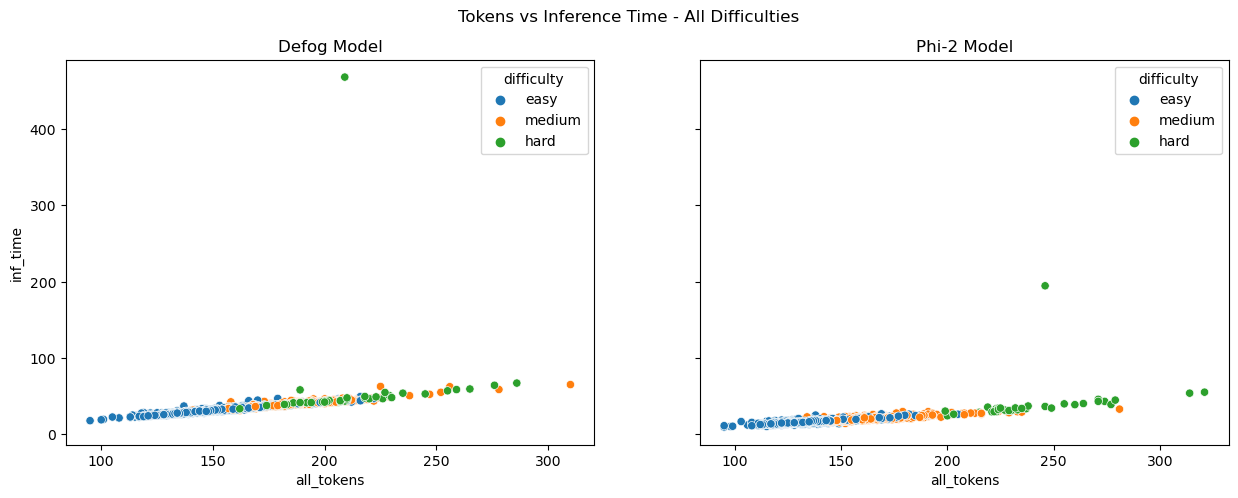

In [7]:
# tokens vs inf_time
figure, axes = plt.subplots(1, 2, sharey=True,
                            figsize=(15, 5))
figure.suptitle('Tokens vs Inference Time - All Difficulties')

axes[0].set_title('Defog Model')
sns.scatterplot(def_eval, x="all_tokens", y="inf_time", hue="difficulty", ax=axes[0])

axes[1].set_title('Phi-2 Model')
sns.scatterplot(phi_eval, x="all_tokens", y="inf_time", hue="difficulty", ax=axes[1])

<Axes: title={'center': 'Phi-2 Model'}, xlabel='all_tokens', ylabel='inf_time'>

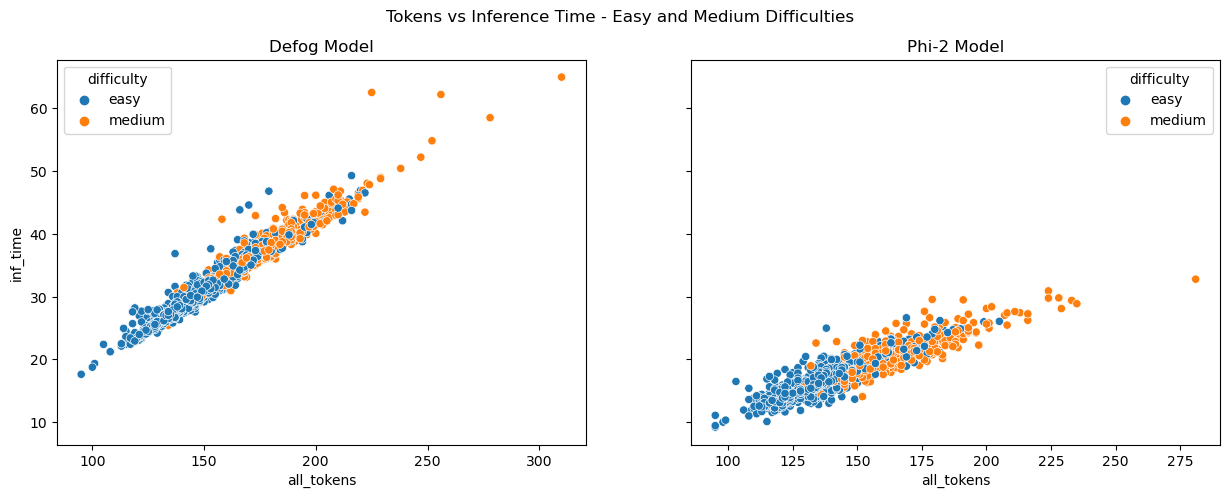

In [8]:
# tokens vs inf_time
figure, axes = plt.subplots(1, 2, sharey=True,
                            figsize=(15, 5))
figure.suptitle('Tokens vs Inference Time - Easy and Medium Difficulties')

axes[0].set_title('Defog Model')
sns.scatterplot(def_eval[def_eval['difficulty'].isin(['easy', 'medium'])], x="all_tokens", y="inf_time", hue="difficulty", ax=axes[0])

axes[1].set_title('Phi-2 Model')
sns.scatterplot(phi_eval[phi_eval['difficulty'].isin(['easy', 'medium'])], x="all_tokens", y="inf_time", hue="difficulty", ax=axes[1])

<Axes: title={'center': 'Phi-2 Model'}, xlabel='inf_time', ylabel='difficulty'>

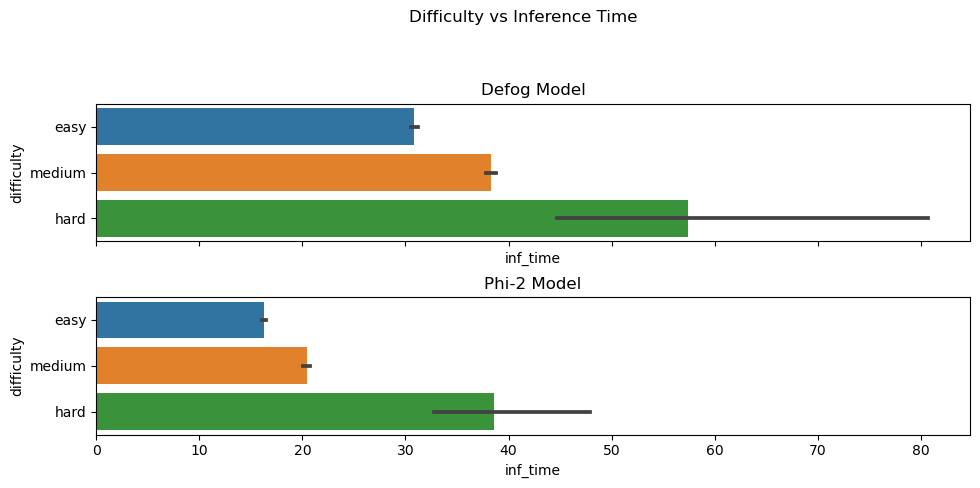

In [9]:
# diffculty vs inf_time - bar
figure, axes = plt.subplots(2, 1, sharex=True,
                            figsize=(10, 5))
figure.suptitle('Difficulty vs Inference Time')
figure.tight_layout(pad=3)

axes[0].set_title('Defog Model')
sns.barplot(def_eval, y="difficulty", x="inf_time", ax=axes[0])

axes[1].set_title('Phi-2 Model')
sns.barplot(phi_eval, y="difficulty", x="inf_time", ax=axes[1])

In [ ]:
## Create DB schema based on context and run the query to check for execution.

## Check perfect matches based on the actual value

## Check partial matches by removing table names i.e., t1.col to col for execution